In [37]:
import pandas as pd

df_sugar_yield = pd.read_excel('SugarYield_Thailand.xlsx')
df_sugar_yield.head()

,Crop,SugarYield
0,08/09,6.816169
1,09/10,6.368175
2,10/11,7.712975
3,11/12,7.927140
4,12/13,7.087977


In [38]:
df_weight = pd.read_excel('weights.xlsx')
df_weight.head()

,Crop,North,Central,North_East,East
0,08/09,0.197982,0.320542,0.433675,0.049024
1,09/10,0.201938,0.335034,0.417645,0.055074
2,10/11,0.207902,0.303045,0.427200,0.061853
3,11/12,0.216778,0.309733,0.417357,0.053723
4,12/13,0.229272,0.306962,0.413135,0.050631


In [39]:
df = pd.merge(df_sugar_yield, df_weight, on='Crop')
df.head()

,Crop,SugarYield,North,Central,North_East,East
0,08/09,6.816169,0.197982,0.320542,0.433675,0.049024
1,09/10,6.368175,0.201938,0.335034,0.417645,0.055074
2,10/11,7.712975,0.207902,0.303045,0.427200,0.061853
3,11/12,7.927140,0.216778,0.309733,0.417357,0.053723
4,12/13,7.087977,0.229272,0.306962,0.413135,0.050631


In [40]:
df.columns

Index(['Crop', 'SugarYield', 'North', 'Central', 'North_East', 'East'], dtype='object')

In [41]:
df_heat_map = df[['SugarYield', 'North', 'Central', 'North_East', 'East']].corr()

<Axes: >

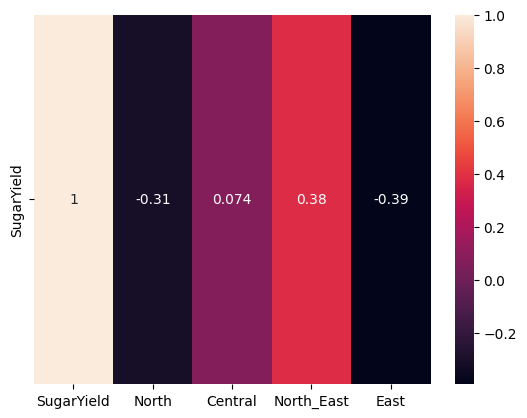

In [53]:
import seaborn as sns

sns.heatmap(df_heat_map.head(1), annot=True)

In [43]:
df_heat_map

,SugarYield,North,Central,North_East,East
SugarYield,1.000000,-0.310219,0.073664,0.380764,-0.394148
North,-0.310219,1.000000,-0.788054,-0.085600,0.208943
Central,0.073664,-0.788054,1.000000,-0.501859,-0.186304
North_East,0.380764,-0.085600,-0.501859,1.000000,-0.315082
East,-0.394148,0.208943,-0.186304,-0.315082,1.000000


# PREDICTION

In [44]:
import pandas as pd

# Load the data into a DataFrame
data = {
    'Year-Month': [],
    'Temperature (Celsius)': [],
    'Precipitation (mm)': []
}

# Populate the data dictionary
start_year = 2009
end_year = 2022
monthly_temperatures = [
    27, 28, 30, 31, 30, 30, 30, 30, 29, 29, 28, 26
]
monthly_precipitation = [
    9, 29, 30, 65, 220, 149, 155, 197, 344, 242, 48, 10
]

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        year_month = f"{year}-{month:02d}"
        temperature = monthly_temperatures[month - 1]
        precipitation = monthly_precipitation[month - 1]
        data['Year-Month'].append(year_month)
        data['Temperature (Celsius)'].append(temperature)
        data['Precipitation (mm)'].append(precipitation)

df = pd.DataFrame(data)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year-Month             168 non-null    object
 1   Temperature (Celsius)  168 non-null    int64 
 2   Precipitation (mm)     168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [46]:
import pandas as pd

# Load the data into a DataFrame
data = {
    'Year-Month': [],
    'Temperature (Celsius)': [],
    'Precipitation (mm)': []
}

# Populate the data dictionary
start_year = 2009
end_year = 2022
monthly_temperatures = [
    27, 28, 30, 31, 30, 30, 30, 30, 29, 29, 28, 26
]
monthly_precipitation = [
    9, 29, 30, 65, 220, 149, 155, 197, 344, 242, 48, 10
]

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        year_month = f"{year}-{month:02d}"
        temperature = monthly_temperatures[month - 1]
        precipitation = monthly_precipitation[month - 1]
        data['Year-Month'].append(year_month)
        data['Temperature (Celsius)'].append(temperature)
        data['Precipitation (mm)'].append(precipitation)

df = pd.DataFrame(data)  ### input your actual data

# Function to calculate the average temperature from October to September
def calculate_avg_temperature(row):
    year = int(row['Year-Month'].split('-')[0])
    if row.name % 12 == 9:  # October
        previous_year_temperature = df.loc[(df['Year-Month'] == f"{year-1}-10"), 'Temperature (Celsius)']
        if len(previous_year_temperature) > 0:
            current_year_temperature = row['Temperature (Celsius)']
            return (previous_year_temperature.values[0] + current_year_temperature) / 2
    return None

# Function to calculate the sum of precipitation from May to October
def calculate_sum_precipitation(row):
    year = int(row['Year-Month'].split('-')[0])
    if row.name % 12 in range(4, 10):  # May to October
        return row['Precipitation (mm)']
    else:
        return None

# Apply the functions to calculate the average temperature and sum of precipitation
df['Avg Temperature (Celsius)'] = df.apply(calculate_avg_temperature, axis=1)
df['Sum Precipitation (mm)'] = df.apply(calculate_sum_precipitation, axis=1)

# Group by the year ranges and calculate the average temperature and sum of precipitation
grouped = df.groupby(df['Year-Month'].str[:4])

# Calculate the average temperature and sum of precipitation for each year range
result = pd.DataFrame({
    ##'Year': grouped.apply(lambda x: f"{x['Year-Month'].iloc[0][:4]}/{x['Year-Month'].iloc[-1][:4]}"),
    'Crop': grouped.apply(lambda x: f"{x['Year-Month'].iloc[0][2:4]}/{str(int(x['Year-Month'].iloc[-1][:4][-2:]) + 1)}"),
    'Average Temperature (Celsius)': grouped['Avg Temperature (Celsius)'].mean(),
    'Sum Precipitation (mm)': grouped['Sum Precipitation (mm)'].sum()
})

# Display the result
result.reset_index(inplace = True)
result.head()

,Year-Month,Crop,Average Temperature (Celsius),Sum Precipitation (mm)
0,2009,09/10,NaN,1307.0
1,2010,10/11,29.0,1307.0
2,2011,11/12,29.0,1307.0
3,2012,12/13,29.0,1307.0
4,2013,13/14,29.0,1307.0


In [51]:
final_data = pd.merge(df_sugar_yield, result, on='Crop')
# remove unnecessary column
final_data.drop(columns = 'Year-Month', inplace = True)

final_data

,Crop,SugarYield,Average Temperature (Celsius),Sum Precipitation (mm)
0,09/10,6.368175,NaN,1307.0
1,10/11,7.712975,29.0,1307.0
2,11/12,7.927140,29.0,1307.0
3,12/13,7.087977,29.0,1307.0
4,13/14,7.643982,29.0,1307.0
5,14/15,7.364632,29.0,1307.0
6,15/16,5.947704,29.0,1307.0
7,16/17,6.356806,29.0,1307.0
8,17/18,8.217723,29.0,1307.0
9,18/19,7.616998,29.0,1307.0


In [48]:
## do the ML

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select the relevant columns for the model
data = df[['Crop', 'SugarYield', 'Precipitation', 'Temperature']]

# Split the data into training and testing sets
X = data[['Precipitation', 'Temperature']]
y = data['SugarYield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [61]:
tuoi = 23
print('tan huy {}')

tan huy
